# Testing basic ML algorithms in 2d 


Test of Logistic regression (LR) and of decision tree (DT) on a classification task with two variables, and a well defined separation line on the 2-d plane.   

### Performance verification :
    
* Look at evolution of loss as a function of the epoch for training and validation samples (only for LR)
* Plot distribution of output probability for signal and background
* Plot ROC
* For relevant variables compare distribution for events with probability<0.5 and events with probability<0.5
* Write out the optimised weights to nderstand the relative importance of variables (LR)
* Draw the final tree (DT)

In [144]:
import math # for mathematical functions such as square root
import numpy as np # for numerical calculations such as histogramming
import matplotlib.pyplot as plt
import pandas as pd

# Generate pattern in 2-d space

Divide a 2-d space in two regions based on a function of the two variables, 
and populate the two regions with randomly distributed points 

In [145]:
# define how many events you want
n=10000
# generate random inputs in [-0.5, 0.5]
X1 = np.random.random(n)-0.5
X2 = np.random.random(n)-0.5
# Define partition of space as a boolean function of the two variables

# linear
Y = X1*0.2+X2*0.3+0.05<0
print("slope= 0.2/0.3=1.66")
# Disjoint areas
# Symmetrical
#Y=((X1<0) & (X2<0)) | ((X1>0.25) & (X2>0.25))
# Asymmetrical
#Y=((X1<-0.33) & (X2<0)) | ((X1>0.28) & (X2>0.40))

# Quadratic
#Y=X1*X1*0.3-X2*0.2>0

# stacking requires vectors to be defined as 2-d vector with
# second dimension=1
X1 = X1.reshape(n, 1)
X2 = X2.reshape(n, 1)
Y = Y.reshape(n, 1)
# print(X1)
# print(X2)
# print(Y)
data= np.hstack((X1, X2, Y))
# print(data)
df = pd.DataFrame(data,columns=['x1', 'x2','SIG'])

slope= 0.2/0.3=1.66


Visualise generated patterns in 2-d parameter space

In [146]:
def plot_scat(df, sel1, sel2, var1, var2, blx, bhx, bly, bhy):
  df_pass = df.query(sel1)
  df_nopass = df.query(sel2)
  fig= plt.figure(figsize=(14,5))
  plt.subplot(1, 2,1)
  plt.xlim([blx,bhx])
  plt.ylim([bly,bhy])
  
  plt.plot(np.asarray(df_nopass[var1]), np.asarray(df_nopass[var2]), 'bo', alpha=0.4, label=sel2)
  plt.legend(loc='best')
  plt.xlabel(var1)
  plt.ylabel(var2)
  plt.subplot(1, 2,2)
  plt.xlim([blx,bhx])
  plt.ylim([blx,bhx])
  plt.plot(np.asarray(df_pass[var1]), np.asarray(df_pass[var2]), 'ro', alpha=0.4, label=sel1)
  plt.legend(loc='best')
  plt.xlabel(var1)
  plt.ylabel(var2)
  plt.show()

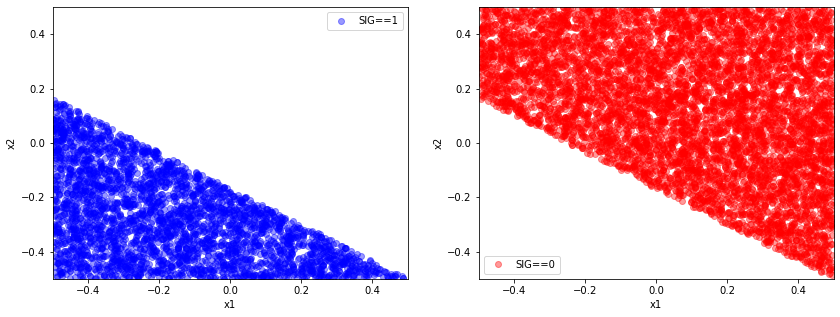

In [147]:
# now plot the covered area for the two 

sel1='SIG==0'
sel2='SIG==1'
plot_scat(df, sel1, sel2, 'x1', 'x2', -0.5, 0.5, -0.5, 0.5)

## Split train test and validation with sklearn

In [148]:
from sklearn.model_selection import train_test_split
#Define vectors for input to ML
# Use 'SIG' column as definition of target
y = df['SIG']
# define dataframe out of all columns except the "SIG" one
X = df[[col for col in df.columns if col!="SIG"]]
col_fin=X.columns
X_tv, X_test, y_tv, y_test = train_test_split(X, y,
                                   test_size=.25, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv,
                                   test_size=.10, random_state=0)


# Logistic regression

Implement in Keras and run

In [149]:
import tensorflow
print(tensorflow.__version__)
from tensorflow import keras
#from keras.utils import plot_model
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import warnings

varnum=X_train.shape[1]
model=keras.Sequential()


# logistic regression
model.add(keras.layers.Dense(1, input_dim=varnum, activation='sigmoid'))
model.summary()

#shallow network
#model.add(keras.layers.Dense(10, input_dim=varnum, activation='relu'))
#model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history=model.fit(X_train, y_train, 
                  validation_data=(X_val,y_val), 
                  batch_size=100, epochs=100)

2.14.0
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
68/68 [==============================] - 0s 2ms/step - loss: 0.6126 - accuracy: 0.8938 - val_loss: 0.5988 - val_accuracy: 0.9200
Epoch 2/100
68/68 [==============================] - 0s 962us/step - loss: 0.5927 - accuracy: 0.9114 - val_loss: 0.5803 - val_accuracy: 0.8973
Epoch 3/100
68/68 [==============================] - 0s 881us/step - loss: 0.5770 - accuracy: 0.8630 - val_loss: 0.5655 - val_accuracy: 0.8400
Epoch 4/100
68/68 [==============================] - 0s 895us/step - loss: 0.5642 - accuracy: 0.8147 - val_loss: 0.

68/68 [==============================] - 0s 930us/step - loss: 0.3742 - accuracy: 0.8806 - val_loss: 0.3647 - val_accuracy: 0.8853
Epoch 55/100
68/68 [==============================] - 0s 894us/step - loss: 0.3721 - accuracy: 0.8815 - val_loss: 0.3627 - val_accuracy: 0.8853
Epoch 56/100
68/68 [==============================] - 0s 939us/step - loss: 0.3701 - accuracy: 0.8833 - val_loss: 0.3608 - val_accuracy: 0.8867
Epoch 57/100
68/68 [==============================] - 0s 982us/step - loss: 0.3682 - accuracy: 0.8844 - val_loss: 0.3588 - val_accuracy: 0.8880
Epoch 58/100
68/68 [==============================] - 0s 2ms/step - loss: 0.3662 - accuracy: 0.8853 - val_loss: 0.3569 - val_accuracy: 0.8880
Epoch 59/100
68/68 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.8871 - val_loss: 0.3550 - val_accuracy: 0.8880
Epoch 60/100
68/68 [==============================] - 0s 893us/step - loss: 0.3624 - accuracy: 0.8889 - val_loss: 0.3531 - val_accuracy: 0.8880
Epoch 61/

## Run prediction

In [150]:
Ypredr=model.predict(X_test)

79/79 [==============================] - 0s 695us/step


## Create dataframe with labels and probabilities 

In [151]:
df_test_acc_r=X_test.copy()
df_test_acc_r['SIG']=y_test
df_test_acc_r['PROB']=Ypredr

# Look at the classification performance

## Plot history of losses along epochs for Keras

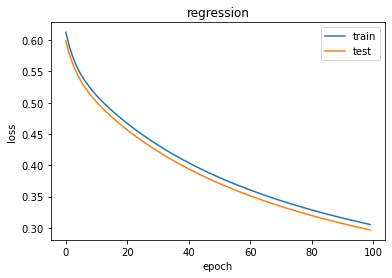

In [152]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('regression')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## Plot distribution of output probabilities  for signal and backround

The output of the classification is for each event a number between 0 and 1 representing the probability that that event is a signal event. Since for each event we know whether it was a signal (SIG=1) or a background (SIG=0), we can plot the output probability of the network for each of the two classes.


nsig  846
nbkg  1654


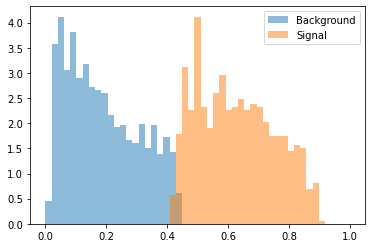

In [153]:
# split according to the label
df_test_acc_r_bkg = df_test_acc_r.query('SIG==0')
df_test_acc_r_sig = df_test_acc_r.query('SIG==1')
print('nsig ',df_test_acc_r_sig.shape[0])
print('nbkg ',df_test_acc_r_bkg.shape[0])
bins = np.linspace(0, 1,50)
plt.hist(df_test_acc_r_bkg.PROB, bins, alpha=0.5, density=True, label='Background')
plt.hist(df_test_acc_r_sig.PROB, bins, alpha=0.5, density=True, label='Signal')
plt.legend(loc='best')
plt.show()

## Plot ROC curve and calculate AUC
In order to perform our the final selection we put a lower limit on the value of the probability and we count the fraction of events above this limit for both signal and backround, i.e for each value of PROB we have two values: The 'true positive rate (TPR)' (efficiency of signal selection in HEP language), and 'false positive rate (FPR)' (efficency for selecting background). If we TPR versus FPR the other as a function of PROB we obtain a curve called the Receive Operating Characteristic (ROC) curve https://en.wikipedia.org/wiki/Receiver_operating_characteristic. Methods for building the ROC curve are availabel in sklearn.metrics. An ideal ROC curve would be along upper x and left y axes of the plot, corresponding to the case where all of the signal events have PROB=1 and all background events have PROB=0. The worst case is a curve where TPR=FPR, i.e. the discrimination power is the same as extracting a random number for PROB.

Regression auc  0.9995619188099056


<function matplotlib.pyplot.show(close=None, block=None)>

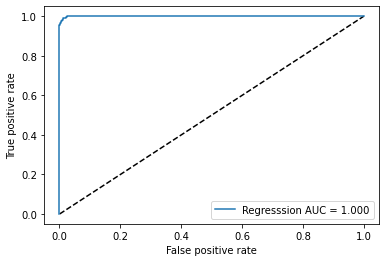

In [154]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

plt.plot([0.001, 1], [0, 1], 'k--')
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, Ypredr)
auc_keras = auc(fpr_keras, tpr_keras)
print("Regression auc ",auc_keras)
plt.plot(fpr_keras, tpr_keras, label='Regresssion AUC = {:.3f}'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')
plt.show    


## Visualise patterns in 2-d space

SIG==0 SIG==1


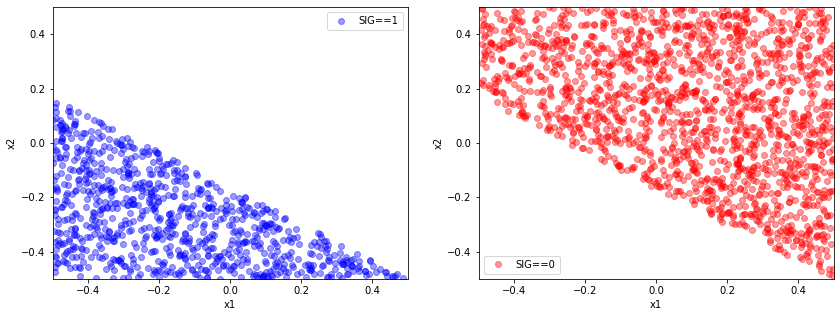

PROB<0.5 PROB>0.5


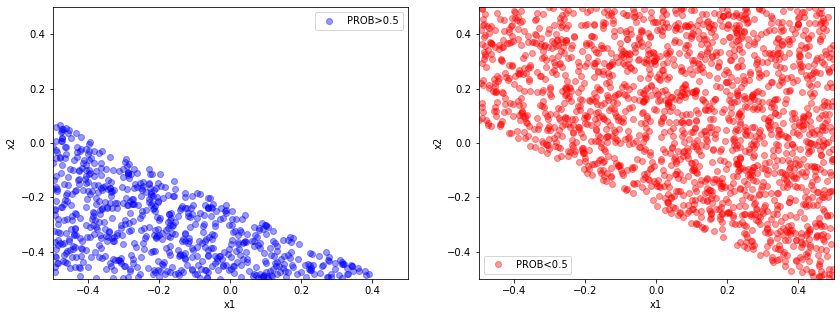

In [155]:
sel1='SIG==0'
sel2='SIG==1'
print(sel1,sel2)
plot_scat(df_test_acc_r, sel1, sel2, 'x1', 'x2', -0.5, 0.5, -0.5, 0.5)
thrmax=0.5
sel1='PROB<'+str(thrmax)
sel2='PROB>'+str(thrmax)
print(sel1,sel2)
plot_scat(df_test_acc_r, sel1, sel2, 'x1', 'x2', -0.5, 0.5, -0.5, 0.5)

## Compare label and prediction in 1-d projections

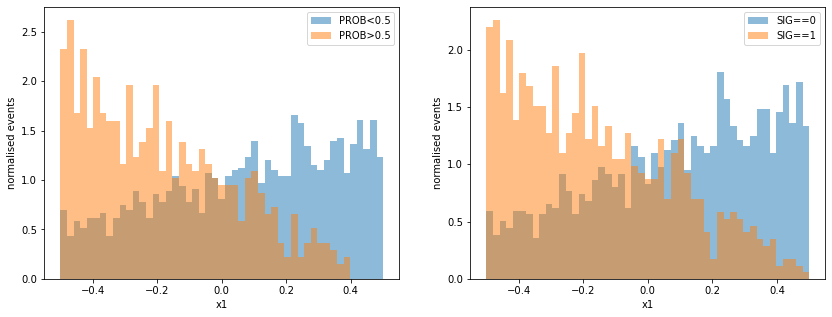

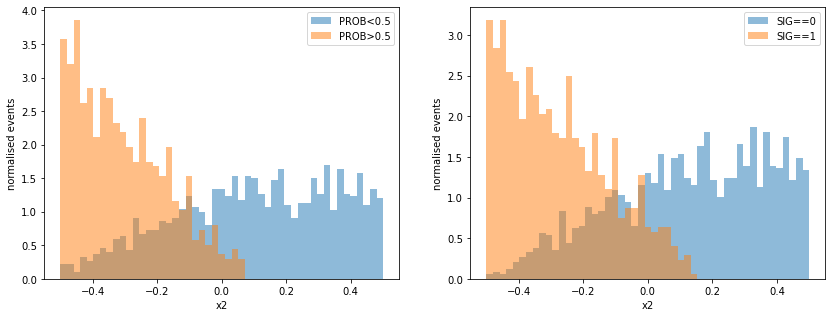

In [156]:
pred_false='PROB<0.5'
pred_true='PROB>0.5'
lab_false='SIG==0'
lab_true='SIG==1'
nbin=50
blow=-0.5
bhigh=0.5
bins = np.linspace(blow, bhigh, nbin)
fig1= plt.figure(figsize=(14,5))
plt.subplot(1, 2,1)
var="x1"
plt.hist(df_test_acc_r.query(pred_false)[var], bins, alpha=0.5, density=True, label=pred_false)
plt.hist(df_test_acc_r.query(pred_true)[var], bins, alpha=0.5, density=True, label=pred_true)
plt.legend(loc='best')
plt.xlabel(var)
plt.ylabel('normalised events')
plt.subplot(1, 2,2)
plt.hist(df_test_acc_r.query(lab_false)[var], bins, alpha=0.5, density=True, label=lab_false)
plt.hist(df_test_acc_r.query(lab_true)[var], bins, alpha=0.5, density=True, label=lab_true)
plt.legend(loc='best')
plt.xlabel(var)
plt.ylabel('normalised events')
plt.show()
fig2= plt.figure(figsize=(14,5))
plt.subplot(1, 2,1)
var="x2"
plt.hist(df_test_acc_r.query(pred_false)[var], bins, alpha=0.5, density=True, label=pred_false)
plt.hist(df_test_acc_r.query(pred_true)[var], bins, alpha=0.5, density=True, label=pred_true)
plt.legend(loc='best')
plt.xlabel(var)
plt.ylabel('normalised events')
plt.subplot(1, 2,2)
plt.hist(df_test_acc_r.query(lab_false)[var], bins, alpha=0.5, density=True, label=lab_false)
plt.hist(df_test_acc_r.query(lab_true)[var], bins, alpha=0.5, density=True, label=lab_true)
plt.legend(loc='best')
plt.xlabel(var)
plt.ylabel('normalised events')
plt.show()

## Visualise weights

If input model was linear the weights should correspond to the coefficients of the line

In [157]:
layer_weights = model.layers[0].get_weights()[0]
layer_biases  = model.layers[0].get_weights()[1]
print('layer weights',layer_weights)
print('layer biases',layer_biases)
print('slope',layer_weights[1]/layer_weights[0])

layer weights [[-2.5160742]
 [-4.0321274]]
layer biases [-0.94184315]
slope [1.602547]


# Exercises

* Uncomment and try different patterns in generation and look how the algorithms performs in different cases
* Study dependence of performance from number of events
* Study dependence of performance of regression from choice of optimizer number of epoch, size of batches
* Uncomment the quadratic shape
    * Look at results with logistic regression
    * Replace logistic regression with shallow network
        * Try to find parameters of shallow network which approximate shape
           (hint: try number of nodes, number of epochs)
* Do the same for disjoint areas
* Extend generation to three variables, and test the algorithms 